In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error

In [4]:

from sklearn.model_selection import GridSearchCV

In [5]:
data=pd.read_csv("processedData.csv")
data.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Price                  0
Manufacture_segment    0
dtype: int64

$split the data$

In [6]:
X=data.drop('Price',axis=1)
y=data['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=1234,
                                                    test_size=0.30
                                                   )

# Remove outliers from X_train #

In [8]:
from scipy import stats
X_train.columns
col=['Kilometers_Driven','Mileage', 'Engine', 'Power']
z_scores = np.abs(stats.zscore(X_train[col]))

threshold=3

outliers_indices = np.where(z_scores>threshold)[0]
X_train=X_train.drop(X_train.index[outliers_indices])
y_train = y_train.drop(y_train.index[outliers_indices])

# Standard scalar #

In [9]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
  

In [10]:
LR = LinearRegression()
DTree = DecisionTreeRegressor()
Rtree = RandomForestRegressor()
LR.fit(X_train_scaled,y_train)
DTree.fit(X_train_scaled,y_train)
Rtree.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [11]:
# Linear Regression
y_LR_pred = LR.predict(X_test_scaled)
# Decision tree
y_DT_pred = DTree.predict(X_test_scaled)
# Random forest
y_RF_pred = Rtree.predict(X_test_scaled)

In [12]:
pd.DataFrame([r2_score(y_test,y_LR_pred)*100,r2_score(y_test,y_DT_pred)*100,r2_score(y_test,y_RF_pred)*100],
            index=['LR','DT','RF'], columns=['R2score'])

,R2score
LR,69.141209
DT,73.897012
RF,88.646956


Comparing above r2_score, choosing the highest Random Forest to build model with Hyper paramters

In [13]:
print('R2 score: ', r2_score(y_test, y_RF_pred)*100)
print('Mean Square Error: ',mean_squared_error(y_test, y_RF_pred)*100)

R2 score:  88.64695575095683
Mean Square Error:  1377.29536667144


# Feature Importance

In [14]:
feat_data = pd.DataFrame({'Feature':X_train.columns, 'Importance':Rtree.feature_importances_})
feat_data = feat_data.sort_values(by='Importance',ascending=True)
feat_data

,Feature,Importance
5,Owner_Type,0.001487
3,Fuel_Type,0.002124
9,Seats,0.003546
4,Transmission,0.007153
0,Location,0.014824
6,Mileage,0.028050
10,Manufacture_segment,0.028067
7,Engine,0.046927
2,Kilometers_Driven,0.050535
1,Year,0.209383


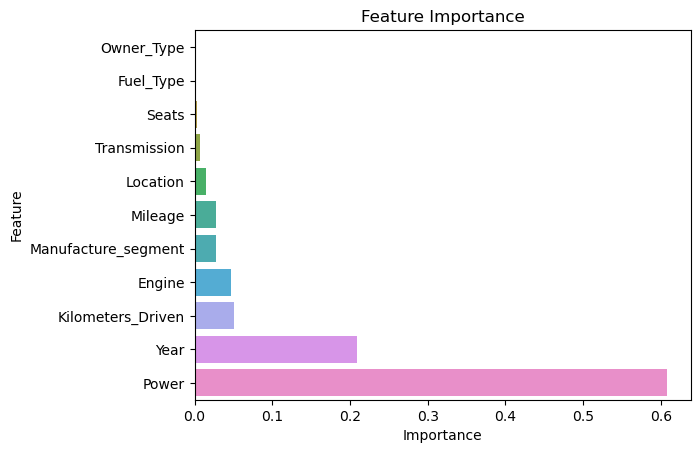

In [15]:
# Bar plot
sns.barplot(x='Importance', y='Feature',data=feat_data)
plt.title('Feature Importance')
plt.show()

# Conclusion #
The aim of this project was to predict the price of the car in India, by analyzing the car features as brand, year, engine, mileage, Kilometers driven, power. During the exploratory data analysis, it was found that there has been a significant increase in car prices after the year 2010. The cars which run on Diesel have hugher price compared to petrol. Luxury German and European cars have the highest price among all segments.

The Random forest regressor model was able to predict the car price with 88.64% accuracy. The most important features for predicting the car price were found to be power and year of the vehicle.